<a href="https://colab.research.google.com/github/Mayank57/Gold_rate_prediction/blob/main/Copy_of_gold_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import acf, pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
path = "/content/drive/MyDrive/gold_data/gld_price_data.csv"
data1 = pd.read_csv(path)
print(data1)
column_name = 'GLD'
data = data1[['Date', column_name]]

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [5]:
data.describe()

,GLD
count,2290.000000
mean,122.732875
std,23.283346
min,70.000000
25%,109.725000
50%,120.580002
75%,132.840004
max,184.589996


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2290 non-null   object 
 1   GLD     2290 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.9+ KB


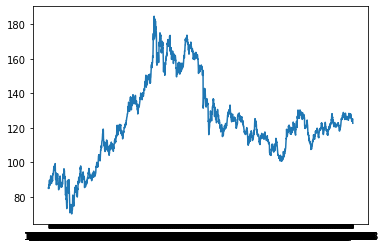

In [7]:
plt.plot(data['Date'], data[column_name])

In [8]:
data = data.dropna()
data

,Date,GLD
0,1/2/2008,84.860001
1,1/3/2008,85.570000
2,1/4/2008,85.129997
3,1/7/2008,84.769997
4,1/8/2008,86.779999
...,...,...
2285,5/8/2018,124.589996
2286,5/9/2018,124.330002
2287,5/10/2018,125.180000
2288,5/14/2018,124.489998


In [9]:
data.set_index('Date', inplace = True)
data

,GLD
Date,
1/2/2008,84.860001
1/3/2008,85.570000
1/4/2008,85.129997
1/7/2008,84.769997
1/8/2008,86.779999
...,...
5/8/2018,124.589996
5/9/2018,124.330002
5/10/2018,125.180000


In [10]:
data = data.dropna()

In [15]:
import itertools
p = q = range(0, 6)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
# print('Some parameter combinations for the Model...')
# for i in range(1,len(pdq)):
#     print('Model: {}'.format(pdq[i]))
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC', 'BIC'])
ARIMA_AIC
for param in pdq:
  try:
    ARIMA_model = ARIMA(data['GLD'].values,order=param).fit()
    print('ARIMA{} - AIC:{} - BIC:{}'.format(param,ARIMA_model.aic,ARIMA_model.bic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic, 'BIC' : ARIMA_model.bic}, ignore_index=True)
  except:
    continue

ARIMA(0, 1, 0) - AIC:8474.279893517047 - BIC:8485.751634156952
ARIMA(0, 1, 1) - AIC:8472.848048615713 - BIC:8490.055659575572
ARIMA(0, 1, 2) - AIC:8473.612893603358 - BIC:8496.556374883168
ARIMA(0, 1, 3) - AIC:8470.770294902115 - BIC:8499.449646501878
ARIMA(0, 1, 4) - AIC:8472.692415108899 - BIC:8507.107637028614
ARIMA(0, 1, 5) - AIC:8473.012692821263 - BIC:8513.163785060931
ARIMA(1, 1, 0) - AIC:8472.681296516967 - BIC:8489.888907476825
ARIMA(1, 1, 1) - AIC:8465.753153878804 - BIC:8488.696635158614
ARIMA(2, 1, 0) - AIC:8473.229287344726 - BIC:8496.172768624536
ARIMA(2, 1, 1) - AIC:8466.543177861982 - BIC:8495.222529461746
ARIMA(3, 1, 0) - AIC:8470.962285515814 - BIC:8499.641637115577
ARIMA(3, 1, 1) - AIC:8472.9605197242 - BIC:8507.375741643915
ARIMA(3, 1, 2) - AIC:8470.489404451902 - BIC:8510.64049669157
ARIMA(3, 1, 3) - AIC:8461.93705470591 - BIC:8507.82401726553
ARIMA(4, 1, 0) - AIC:8472.95805589412 - BIC:8507.373277813835
ARIMA(4, 1, 1) - AIC:8474.846278633227 - BIC:8514.99737087289

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(4, 1, 4) - AIC:8471.367802373721 - BIC:8528.726505573246
ARIMA(5, 1, 0) - AIC:8472.870011310648 - BIC:8513.021103550316
ARIMA(5, 1, 1) - AIC:8474.818146352594 - BIC:8520.705108912214
ARIMA(5, 1, 2) - AIC:8467.772545986056 - BIC:8519.395378865629
ARIMA(5, 1, 3) - AIC:8464.012284798322 - BIC:8521.370987997847
ARIMA(5, 1, 4) - AIC:8464.643596690255 - BIC:8527.738170209734
ARIMA(5, 1, 5) - AIC:8466.844004258824 - BIC:8535.674448098256


In [16]:
#depending upon AIC and BIC values we go for order = (3,1,3)
y = data[column_name]

# Fit model
model = ARIMA(y, order=(3,1,3))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.GLD   No. Observations:                 2289
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -4222.969
Method:                       css-mle   S.D. of innovations              1.530
Date:                Mon, 26 Jul 2021   AIC                           8461.937
Time:                        10:12:15   BIC                           8507.824
Sample:                             1   HQIC                          8478.671
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0165      0.032      0.515      0.606      -0.046       0.079
ar.L1.D.GLD    -1.3768      0.013   -106.712      0.000      -1.402      -1.351
ar.L2.D.GLD    -1.3715      0.008   -173.357    

In [17]:
step = 20
predicted_auto_ARIMA = model_fit.forecast(steps = step)
print(predicted_auto_ARIMA[0])

[122.74430443 122.62430987 122.54185754 122.70282478 122.78864715
 122.60760051 122.6604637  122.83031639 122.7776586  122.64357554
 122.81306566 122.89252236 122.75872834 122.74698259 122.9471685
 122.89543503 122.7812687  122.89259093 123.02391839 122.87912906]
